In [6]:
#############################
########분석환경준비#########
#############################

#데이타 입출력 및 처리 라이브러리 입력
import pandas as pd

#요인분석 라이브러리 입력
from factor_analyzer import FactorAnalyzer

#데이터 시각화 라이브러리 입력
import matplotlib.pyplot as plt

#행렬 및 다차원 분석을 위한 라이브러리 입력
import numpy as np

In [7]:
###(1)데이터 입력 및 처리
##원 데이터 입력
df=pd.read_csv("BostonHousingData.csv")

##변수이름 확인
display(df.columns)

##등간척도 또는 비율척도로 측정된 양적변수명 확인
exploratory_items=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

##양적변수만 efa대상으로 선택
df_efa=df[exploratory_items]

##데이터 확인
display(df_efa)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.585,5.569,73.5,2.3999,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9


In [8]:
###(2)요인분석을 위한 데이터확인
##바틀렛 구형성 검정-카이제곱결정 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df_efa)
print("chi_square_value is", chi_square_value)
print("p-value is", p_value)
print("")

##KMO검정 >=0.7 is OK
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_efa)
print("Result for KMO test is", kmo_model)


chi_square_value is 3229.522255466045
p-value is 0.0

Result for KMO test is 0.8658920697872458


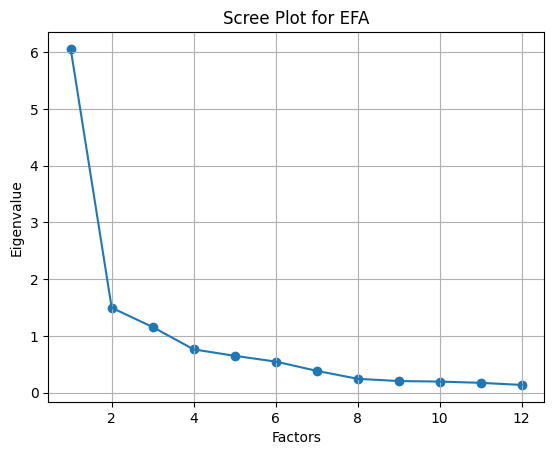

,Factor1,Factor2,Factor3,uniqueness
CRIM,0.155663,0.205848,0.588819,0.586688
ZN,-0.675474,-0.356525,-0.001483,0.416623
INDUS,0.607462,0.315839,0.491518,0.289646
NOX,0.697410,0.178981,0.512864,0.218556
RM,-0.142336,-0.774638,-0.094456,0.370755
AGE,0.740765,0.201266,0.308939,0.315316
DIS,-0.882587,-0.070272,-0.297819,0.127406
TAX,0.329315,0.264694,0.771469,0.226325
PTRATIO,0.174213,0.497381,0.203891,0.680690
B,-0.140410,-0.139206,-0.501599,0.709305


,Factor1,Factor2,Factor3
SS Loadings,2.999037,2.431067,2.230707
Proportion Var,0.249920,0.202589,0.185892
Cummulative Var,0.249920,0.452509,0.638401


In [9]:
#### (3) 탐색적 요인분석 수행 및 결과 확인 ####
# 요인분석 클래스의 인스턴스 생성
efa1 = FactorAnalyzer(method='minres', n_factors=2, rotation='varimax')
#fa.analyze()
efa1.fit(df_efa)

# 고유값과 고유벡터 획득
ev1, v1 = efa1.get_eigenvalues()

plt.scatter(range(1, df_efa.shape[1]+1), ev1)
plt.plot(range(1, df_efa.shape[1]+1), ev1)
plt.title("Scree Plot for EFA")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

# 탐색적 요인분석 결과 확인 및 해석
efa2 = FactorAnalyzer(method='minres', n_factors=3, rotation='varimax')
efa2.fit(df_efa)
efa2_result1 = pd.DataFrame(efa2.loadings_,
                            index = exploratory_items,
                            columns = ['Factor1', 'Factor2', 'Factor3'])
efa2_result1.loc[:, 'uniqueness'] = pd.Series(efa2.get_uniquenesses(), index = exploratory_items)
display(efa2_result1)

efa2_result2 = pd.DataFrame(efa2.get_factor_variance(),
                            index = ['SS Loadings', 'Proportion Var', 'Cummulative Var'],
                            columns = ['Factor1', 'Factor2', 'Factor3'])
display(efa2_result2)

In [10]:
#### (4) 확인적 요인분석 ####
##확인적 요인분석용 라이브러리 입력
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser

# 검증에 사용할 변수 선택
confirmatory_items = ['CRIM', 'LSTAT', 'INDUS', 'PTRATIO', 'RM', 'ZN']
df_cfa = df[confirmatory_items]

# 검증할 구성개념 정의 위화감 편의시설
factors = ['Disharmony', 'Convenience']
factors_items_dict = {}

factors_items_dict['Disharmony'] = ['CRIM', 'LSTAT']
factors_items_dict['Convenience'] = ['INDUS', 'PTRATIO', 'RM', 'ZN']

# 구성개념과 변수 사이의 관계 정의
model_dict = factors_items_dict
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df_cfa, model_dict)
print(model_spec)
print("Data for CFA")
display(df_cfa)

## 확인적 요인분석 수행
cfa2 = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa2.fit(df_cfa.values)
cfa2.loadings_

## 요인적재량 확인
cfa2_result = pd.DataFrame(cfa2.loadings_,
                           index = confirmatory_items,
                           columns = ['Disharmony', 'Convenience'])
print("")
print("Factor Loadings")
display(cfa2_result)

## 크론바하 알파 계산
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems - 1)) * (1 - itemvars.sum() / tscores.var(ddof=1))

dictionaryLength = len( factors_items_dict )
alpha = np.zeros(dictionaryLength)

i=0
for key, value in factors_items_dict.items():
    alpha[i] = CronbachAlpha(df_cfa[value])
    i = i+1

cfa2_alpha = pd.DataFrame( alpha, index =['Disharmony', 'Convenience'], columns = ['Cronbach\'s Alpha'])
display(cfa2_alpha)

## 요인점수 계산
def calculatingFactorScore(itemscores):
    itemscores = np.asarray(itemscores)
    itemsum = itemscores.sum(axis=0)
    nitem = itemscores.shape[0]
    return (itemsum)/(nitem)

factorScore = {}
for key, value in factors_items_dict.items():
    print(key)
    tempAverage = calculatingFactorScore(df_cfa[value])
    print(calculatingFactorScore(df_cfa[value]))
    factorScore[key] = tempAverage
    print('')


Data for CFA


,CRIM,LSTAT,INDUS,PTRATIO,RM,ZN
0,0.00632,4.98,2.31,15.3,6.575,18.0
1,0.02731,9.14,7.07,17.8,6.421,0.0
2,0.02729,4.03,7.07,17.8,7.185,0.0
3,0.03237,2.94,2.18,18.7,6.998,0.0
4,0.02985,5.21,2.18,18.7,6.430,0.0
...,...,...,...,...,...,...
389,0.17783,15.10,9.69,19.2,5.569,0.0
390,0.22438,14.33,9.69,19.2,6.027,0.0
391,0.04527,9.08,11.93,21.0,6.120,0.0
392,0.06076,5.64,11.93,21.0,6.976,0.0



Factor Loadings


,Disharmony,Convenience
CRIM,-369.171968,0.000000
LSTAT,-137.387700,0.000000
INDUS,0.000000,-518.605322
PTRATIO,0.000000,-366.916456
RM,0.000000,-292.733523
ZN,0.000000,18.799752


,Cronbach's Alpha
Disharmony,0.620602
Convenience,-0.616187


Disharmony
[ 3.69013617 12.76911168]

Convenience
[11.00086294 18.53756345  6.28001523 11.4606599 ]

